In [1]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape


(60000, 28, 28)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



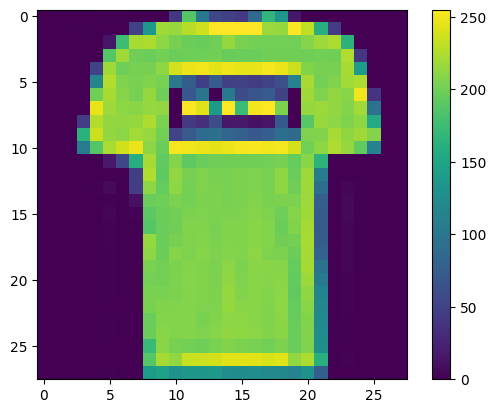

In [6]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

In [7]:
train_images = train_images/255
test_images = test_images/255


In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [9]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
model.fit(train_images,train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5015 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3827 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3393 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3135 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2828 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2706 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2609 - accuracy: 0.9025
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8820
Test Accuracy:  0.8820000290870667


In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [14]:
predictions[0]


array([2.3355325e-08, 1.0010816e-09, 6.1176597e-09, 3.8822753e-10,
       7.3028460e-08, 3.8638616e-03, 6.3981729e-06, 2.8168613e-02,
       2.2916945e-06, 9.6795875e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])


9

In [16]:
test_labels[0]

9

Pick a number: 1
1/1 [==============================] - 0s 14ms/step


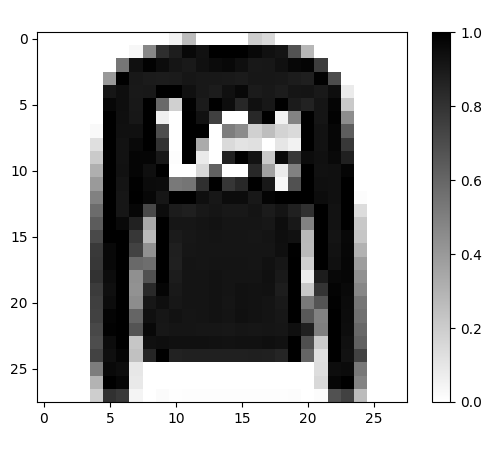

In [18]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)